In [10]:
import pandas as pd
import numpy as np
from datetime import datetime

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [11]:
# Select columns we want to use
columns_to_select = ['City Name', 'Package', 'Variety','Date', 'Low Price', 'High Price', 'Mostly Low',
                     'Origin', 'Item Size', 'Color', 'Mostly High']
pumpkins = full_pumpkins.loc[:, columns_to_select]

In [24]:
# Drop rows with missing values
pumpkins.dropna(inplace=True)
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
pumpkins['DayOfYear'] = day_of_year
pumpkins = pumpkins.drop(columns='Date')

#Print out head
pumpkins.head()

/var/folders/69/3zfv6ss12wg3l2jfn6_by2xh0000gn/T/ipykernel_22556/1094756193.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,City Name,Package,Variety,Low Price,High Price,Mostly Low,Origin,Item Size,Color,Mostly High,DayOfYear
2,BALTIMORE,24 inch bins,HOWDEN TYPE,160.0,160.0,160.0,DELAWARE,med,ORANGE,160.0,267
3,BALTIMORE,24 inch bins,HOWDEN TYPE,160.0,160.0,160.0,VIRGINIA,med,ORANGE,160.0,267
4,BALTIMORE,24 inch bins,HOWDEN TYPE,90.0,100.0,90.0,MARYLAND,lge,ORANGE,100.0,309
5,BALTIMORE,24 inch bins,HOWDEN TYPE,90.0,100.0,90.0,MARYLAND,lge,ORANGE,100.0,316
6,BALTIMORE,36 inch bins,HOWDEN TYPE,160.0,170.0,160.0,MARYLAND,med,ORANGE,170.0,267


In [25]:
from sklearn.preprocessing import OrdinalEncoder

# Encode the 'Item Size' columns using ordinal encoding
item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

In [26]:
from sklearn.preprocessing import OneHotEncoder

# Encode all the other features using one-hot encoding
categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [35]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[
     ('ord', ordinal_encoder, ordinal_features),
     ('cat', categorical_encoder, categorical_features)
 ])
    
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)
encoded_features.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
non_columns = ['Low Price', 'High Price', 'Mostly Low', 'Mostly High', 'DayOfYear']

other = pumpkins.loc[:,non_columns]

In [39]:
from sklearn.preprocessing import LabelEncoder

# Encode the color column using label encoding
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])
encoded_pumpkins = encoded_features.assign(Color=encoded_label)
encoded_pumpkins = encoded_pumpkins.join(other)
encoded_pumpkins.head(50)

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color,Low Price,High Price,Mostly Low,Mostly High,DayOfYear
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,160.0,160.0,160.0,160.0,267
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,160.0,160.0,160.0,160.0,267
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,90.0,100.0,90.0,100.0,309
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,90.0,100.0,90.0,100.0,316
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,160.0,170.0,160.0,170.0,267
7,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,160.0,160.0,160.0,160.0,267
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,160.0,170.0,160.0,170.0,274
9,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,160.0,160.0,160.0,160.0,274
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,160.0,170.0,160.0,170.0,281
11,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,160.0,160.0,160.0,160.0,281


In [40]:
from sklearn.model_selection import train_test_split

X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]
y = encoded_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted Lables: ', predictions)
print('F1-score', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       170
           1       0.64      0.80      0.71        20

    accuracy                           0.93       190
   macro avg       0.81      0.87      0.84       190
weighted avg       0.94      0.93      0.93       190

Predicted Lables:  [1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1]
F1-score 0.7111111111111111


/Users/treyhutson/Documents/Roswell/ML-For-Beginners/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


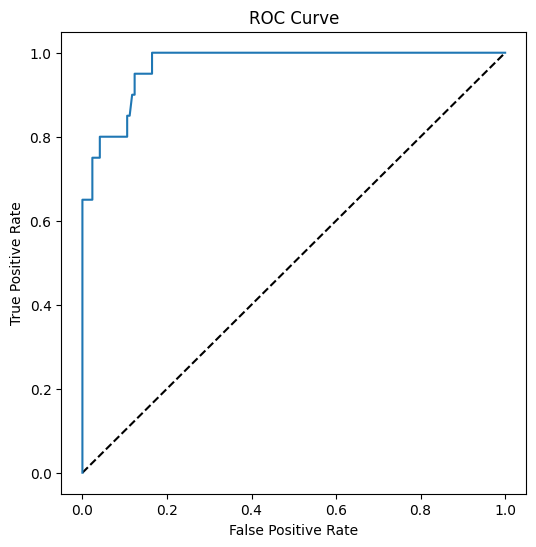

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [43]:
auc = roc_auc_score(y_test, y_scores[:,1])
print(auc)

0.9701470588235295
